### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, f1_score


### Preprocessing

Either download the dataset from Kaggle ([link](https://www.kaggle.com/competitions/titanic/data?select=train.csv)) and use the train.csv or import it with the following line:

In [2]:
!wget -O titanic.csv https://www.dropbox.com/scl/fi/eqqo8uun7lxs0qnzq0por/train.csv?rlkey=lf7t3dnwdfkjyvi2z574xkz5j&dl=0

--2024-03-08 11:31:06--  https://www.dropbox.com/scl/fi/eqqo8uun7lxs0qnzq0por/train.csv?rlkey=lf7t3dnwdfkjyvi2z574xkz5j
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf1b9d8c49d81e4d69b6eca95fe.dl.dropboxusercontent.com/cd/0/inline/COsc0GqWtJRdwXecxuJ2PdtIdg3FAB73HWkzh6r1hd-zm-N7YywsGTCXyV79qm1Cb-MfPnrQj8cWi84heFQMbCw9ttLCWskq5vMVnLSJE5b6k90cpywos4qRvKYvwzFxbkx4kKhWQnoaT5UWLwtC_pMW/file# [following]
--2024-03-08 11:31:07--  https://ucf1b9d8c49d81e4d69b6eca95fe.dl.dropboxusercontent.com/cd/0/inline/COsc0GqWtJRdwXecxuJ2PdtIdg3FAB73HWkzh6r1hd-zm-N7YywsGTCXyV79qm1Cb-MfPnrQj8cWi84heFQMbCw9ttLCWskq5vMVnLSJE5b6k90cpywos4qRvKYvwzFxbkx4kKhWQnoaT5UWLwtC_pMW/file
Resolving ucf1b9d8c49d81e4d69b6eca95fe.dl.dropboxusercontent.com (ucf1b9d8c49d81e4d69b6eca95fe.dl.dropboxusercontent.com)... 162.125.1.15
Connecting to ucf1b9d8c49d81e4d69b6eca

In [3]:
# Load the Titanic dataset (assuming you have the dataset CSV file)
titanic_df = pd.read_csv('titanic.csv', index_col="PassengerId")

# Display the head
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Count the percentage of missing values in each column
titanic_df.isnull().sum() / len(titanic_df) * 100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [5]:
# select only the following features and save the new dataset into titanic_df
# [['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
titanic_df = titanic_df.loc[:, ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

titanic_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,0
2,1,female,38.0,1,0,71.2833,1
3,3,female,26.0,0,0,7.9250,1
4,1,female,35.0,1,0,53.1000,1
5,3,male,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
887,2,male,27.0,0,0,13.0000,0
888,1,female,19.0,0,0,30.0000,1
889,3,female,NaN,1,2,23.4500,0


In [6]:
# drop all nulls
titanic_df.dropna(inplace=True)

# notice that the number of rows drop
titanic_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,0
2,1,female,38.0,1,0,71.2833,1
3,3,female,26.0,0,0,7.9250,1
4,1,female,35.0,1,0,53.1000,1
5,3,male,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,3,female,39.0,0,5,29.1250,0
887,2,male,27.0,0,0,13.0000,0
888,1,female,19.0,0,0,30.0000,1


In [7]:
# Convert categorical variables (e.g., 'Sex') to numerical using one-hot encoding
# You will have two colums sex_female, sex_male.
# drop_firs drops first one from among them
titanic_df = pd.get_dummies(titanic_df, columns=['Sex'], drop_first=True)

titanic_df

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_male
PassengerId,,,,,,,
1,3,22.0,1,0,7.2500,0,True
2,1,38.0,1,0,71.2833,1,False
3,3,26.0,0,0,7.9250,1,False
4,1,35.0,1,0,53.1000,1,False
5,3,35.0,0,0,8.0500,0,True
...,...,...,...,...,...,...,...
886,3,39.0,0,5,29.1250,0,False
887,2,27.0,0,0,13.0000,0,True
888,1,19.0,0,0,30.0000,1,False


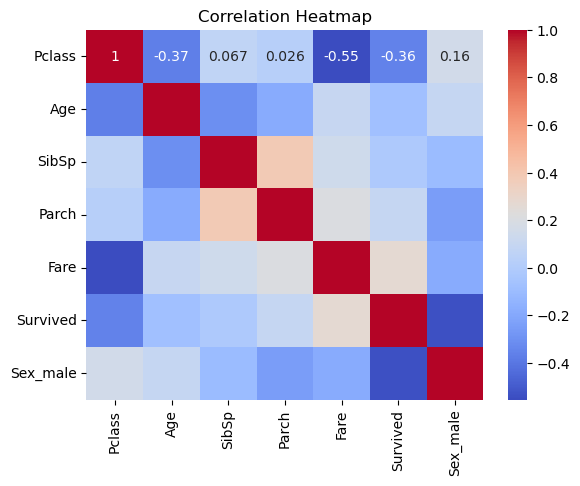

In [8]:
# Visualize the correlation between numerical variables
sns.heatmap(titanic_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Spliting Dataset

In [9]:
# Selecting relevant columns
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male']
target = 'Survived'

X = titanic_df.drop(target, axis=1)
y = titanic_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Pipeline

In [10]:
# Random Forest Pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),         # Step 1: Standardize features by removing the mean and scaling to unit variance
    ('classifier', RandomForestClassifier())  # Step 2: Random Forest classifier for classification tasks
])

# Logistic Regression Pipeline
  # Step 1: Standardize features by removing the mean and scaling to unit variance
  # Step 2: Logistic Regression for classification tasks
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),         
    ('classifier', LogisticRegression())  
])

# SVM Pipeline
  # Step 1: Standardize features by removing the mean and scaling to unit variance
  # Step 2: Support Vector Classifier (SVC) for classification tasks
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),         
    ('classifier', SVC())  
])



### Parameter Grids

In [11]:
# Define parameter grids for Random Forest classifier
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],  # Step 1: Number of trees in the forest [100, 200, 300]
    'classifier__max_depth': [5, 10, 15]          # Step 2: Maximum depth of the tree  [5, 10, 15]
}

# Define parameter grids for Logistic Regression classifier
  # Step 1: C: Inverse of regularization strength; smaller values specify stronger regularization; Use: [0.1, 1, 10]
  # Step 2: penalty: Type of penalty; Use: 'l1' for Lasso
  # Step 3: solver: Algorithm to use in the optimization problem; Us: ['liblinear', 'saga']
param_grid_lr = {
    'classifier__C': [0.1, 1, 10],  
    'classifier__penalty': ['l1'], 
    'classifier__solver': ['liblinear', 'saga']
}




# Define parameter grids for SVM classifier
  # Step 1: C: Regularization parameter; Use: [0.1, 1, 10]
  # Step 2: kernal: Kernel type to be used in the algorithm; Use: ['linear', 'rbf']
param_grid_svm = {
    'classifier__C': [0.1, 1, 10],  # Step 1: Regularization parameter
    'classifier__kernel': ['linear', 'rbf']  # Step 2: Kernel type
}



# Define the scoring metrics you want to use
scoring = {
    'accuracy': make_scorer(accuracy_score),         # Scoring based on accuracy_score
    'f1_score': make_scorer(f1_score)                # Scoring based on F1_score
}


### GridSearchCV

In [12]:
# Create GridSearchCV instance for Random Forest algorithm
# Parameters:
# Random Forest pipeline, param_grid_rf, 5-fold cross-validation (cv=5), scoring metrics specified in scoring dictionary
# Refit the model based on the F1-score to get the best model
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, scoring=scoring, refit='f1_score',  n_jobs=-1)

# Create GridSearchCV instance for Logistic Regression algorithm
# Step 1: Perform grid search using Logistic Regression pipeline
# Step 2: Use parameter combinations defined in param_grid_lr
# Step 3: Use 5-fold cross-validation (cv=5) for model evaluation
# Step 4: Use scoring metrics specified ealier and  n_jobs=-1
# Step 5: Refit the model based on the F1-score to get the best model
grid_search_lr = GridSearchCV(lr_pipeline, param_grid_lr, cv=5, scoring=scoring, refit='f1_score', n_jobs=-1)


# Create GridSearchCV instance for SVM algorithm
# Step 1: Perform grid search using SVM pipeline
# Step 2: Use parameter combinations defined in param_grid_svm
# Step 3: Use 5-fold cross-validation (cv=5) for model evaluation
# Step 4: Use scoring metrics specified ealier and  n_jobs=-1
# Step 5: Refit the model based on the F1-score to get the best model
grid_search_svm = GridSearchCV(svm_pipeline, param_grid_svm, cv=5, scoring=scoring, refit='f1_score', n_jobs=-1)


In [13]:
# Fit the Random Forest model
grid_search_rf.fit(X_train, y_train)

# Fit the Logistic Regression model
grid_search_lr.fit(X_train, y_train)

# Fit the SVM model
grid_search_svm.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__kernel': ['linear', 'rbf']},
             refit='f1_score',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score)})

In [14]:
# Get the best parameters for Random Forest based on F1 score
best_params_rf = grid_search_rf.best_params_

# Get the best parameters for Logistic Regression based on F1 score
best_params_lr = grid_search_lr.best_params_

# Get the best parameters for SVM based on F1 score
best_params_svm = grid_search_svm.best_params_


In [15]:
# Access the results for Random Forest with both scoring metrics
results_rf = grid_search_rf.cv_results_

# Access the results for Logistic Regression with both scoring metrics
results_lr = grid_search_lr.cv_results_

# Access the results for SVM with both scoring metrics
results_svm = grid_search_svm.cv_results_


### Results

In [16]:
# Print the results for Random Forest
print("Random Forest Results:")
print("Accuracy scores:", results_rf['mean_test_accuracy'])  # Print mean_test_accuracy
print("F1 scores:", results_rf['mean_test_f1_score'])        # Print mean F1 scores
print("\nBest Parameters for Random Forest based on F1:", best_params_rf)  # Print best parameters based on F1 score


# Print the results for Logistic Regression
print("\nLogistic Regression Results:")
print("Accuracy scores:", results_lr['mean_test_accuracy']) # Print mean_test_accuracy
print("F1 scores:", results_lr['mean_test_f1_score'])       # Print mean F1 scores
print("\nBest Parameters for Logistic Regression based on F1:", best_params_lr) # Print best parameters based on F1 score


# Print the results for SVM
print("\nSVM Results:")
print("Accuracy scores:", results_svm['mean_test_accuracy'])  # Print mean_test_accuracy
print("F1 scores:", results_svm['mean_test_f1_score'])        # Print mean F1 scores
print("\nBest Parameters for SVM based on F1:", best_params_svm)  # Print best parameters based on F1 score

Random Forest Results:
Accuracy scores: [0.83366895 0.82492754 0.82666667 0.82839054 0.84416476 0.83012967
 0.82138825 0.81614035 0.81964912]
F1 scores: [0.78300463 0.77294663 0.77085017 0.78231557 0.80014537 0.78343224
 0.77520766 0.77098875 0.77278796]

Best Parameters for Random Forest based on F1: {'classifier__max_depth': 10, 'classifier__n_estimators': 200}

Logistic Regression Results:
Accuracy scores: [0.79687262 0.798627   0.80739893 0.81089245 0.81264683 0.81440122]
F1 scores: [0.74542357 0.74110637 0.75639261 0.75960233 0.76242365 0.76419145]

Best Parameters for Logistic Regression based on F1: {'classifier__C': 10, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}

SVM Results:
Accuracy scores: [0.79162471 0.8056598  0.79162471 0.81967963 0.79162471 0.83540809]
F1 scores: [0.72962373 0.74354068 0.72962373 0.76344627 0.72962373 0.79578341]

Best Parameters for SVM based on F1: {'classifier__C': 10, 'classifier__kernel': 'rbf'}


In [17]:
# keys present in the results_svm
results_svm.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_classifier__C', 'param_classifier__kernel', 'params', 'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy', 'split0_test_f1_score', 'split1_test_f1_score', 'split2_test_f1_score', 'split3_test_f1_score', 'split4_test_f1_score', 'mean_test_f1_score', 'std_test_f1_score', 'rank_test_f1_score'])

In [18]:
# Extract the mean test accuracy and test accuracy scores for Random Forest
mean_test_accuracy_rf = results_rf['mean_test_accuracy']  # Mean test accuracy scores
test_accuracy_rf = grid_search_rf.score(X_test, y_test)   # Test accuracy score on the test set

# Extract the mean test accuracy and test accuracy scores for Logistic Regression
mean_test_accuracy_lr = results_lr['mean_test_accuracy'] # Mean test accuracy scores
test_accuracy_lr = grid_search_lr.score(X_test, y_test)  # Test accuracy score on the test set

# Extract the mean test accuracy and test accuracy scores for SVM
mean_test_accuracy_svm = results_svm['mean_test_accuracy'] # Mean test accuracy scores
test_accuracy_svm = grid_search_svm.score(X_test, y_test)  # Test accuracy score on the test set


In [19]:
# Create a dataframe
data = {
    'Algorithm': ['Random Forest', 'Logistic Regression', 'SVM'],
    'Mean Test Accuracy': [np.mean(mean_test_accuracy_rf), np.mean(mean_test_accuracy_lr), np.mean(mean_test_accuracy_svm)],
    'Test Accuracy': [test_accuracy_rf, test_accuracy_lr, test_accuracy_svm]
}

pd.DataFrame(data)


,Algorithm,Mean Test Accuracy,Test Accuracy
0,Random Forest,0.827236,0.756757
1,Logistic Regression,0.806807,0.666667
2,SVM,0.805937,0.730435


### Build a function with the code

In [20]:
def evaluate_classifier(name, pipeline, param_grid, scoring, X_train, y_train, X_test, y_test):

    print(f'Model name: {name} \n')
    # Create a GridSearchCV instance for the pipeline
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=scoring, refit='f1_score')

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Make predictions on the test set
    test_predictions = grid_search.predict(X_test)

    # Calculate accuracy and F1 score on the test set
    accuracy = accuracy_score(y_test, test_predictions)
    f1 = f1_score(y_test, test_predictions)

    # Print test results
    print("Test Accuracy:", accuracy)
    print("Test F1 Score:", f1)
    print


In [21]:
# Call the function for Random Forest
evaluate_classifier('rf', rf_pipeline, param_grid_rf, scoring, X_train, y_train, X_test, y_test)


# Call the function for Logistic Regression
evaluate_classifier('Logistic Regression', lr_pipeline, param_grid_lr, scoring, X_train, y_train, X_test, y_test)



# Call the function for SVM
evaluate_classifier('SVM', svm_pipeline, param_grid_svm, scoring, X_train, y_train, X_test, y_test)


Model name: rf 



Test Accuracy: 0.8041958041958042
Test F1 Score: 0.7407407407407408
Model name: Logistic Regression 

Test Accuracy: 0.7482517482517482
Test F1 Score: 0.6666666666666666
Model name: SVM 

Test Accuracy: 0.7832167832167832
Test F1 Score: 0.7304347826086958


### MLOps and tracking the results - Optional

In [22]:
#pip install scikit-learn wandb

In [23]:
import wandb

def evaluate_classifier(name, pipeline, param_grid, scoring, X_train, y_train, X_test, y_test):


    # Initialize W&B
    wandb.init(name=name, project='project_ENSF_611')


    # Create a GridSearchCV instance for the pipeline
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=scoring, refit='f1_score')

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Log the results to W&B
    wandb.log({'Algorithm': name})
    wandb.log({"Best F1 Score": grid_search.best_score_})
    wandb.log({"Best Parameters": grid_search.best_params_})

    # Make predictions on the test set
    test_predictions = grid_search.predict(X_test)

    # Calculate accuracy and F1 score on the test set
    accuracy = accuracy_score(y_test, test_predictions)
    f1 = f1_score(y_test, test_predictions)

    # Log test results to W&B
    wandb.log({"Test Accuracy": accuracy})
    wandb.log({"Test F1 Score": f1})

    # Print test results
    print("Test Accuracy:", accuracy)
    print("Test F1 Score:", f1)

In [24]:
# Call the function for Random Forest
evaluate_classifier('rf', rf_pipeline, param_grid_rf, scoring, X_train, y_train, X_test, y_test)

# Call the function for Logistic Regression
evaluate_classifier('lr' ,lr_pipeline, param_grid_lr, scoring, X_train, y_train, X_test, y_test)


# Call the function for SVM
evaluate_classifier('svm', svm_pipeline, param_grid_svm, scoring, X_train, y_train, X_test, y_test)


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: sudarshansudu1 (sudu-team). Use `wandb login --relogin` to force relogin


Test Accuracy: 0.7832167832167832
Test F1 Score: 0.7102803738317757


Best F1 Score,▁
Test Accuracy,▁
Test F1 Score,▁
Algorithm,rf
Best F1 Score,0.78329
Test Accuracy,0.78322
Test F1 Score,0.71028


Test Accuracy: 0.7482517482517482
Test F1 Score: 0.6666666666666666


Best F1 Score,▁
Test Accuracy,▁
Test F1 Score,▁
Algorithm,lr
Best F1 Score,0.76419
Test Accuracy,0.74825
Test F1 Score,0.66667


Test Accuracy: 0.7832167832167832
Test F1 Score: 0.7304347826086958
